In [1]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import itertools
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import h5py
import os
import yaml
import torchvision
import EIANN.plot as plot

C:\Users\bchen\AppData\Local\Temp\ipykernel_19112\800465554.py:6: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
N = 2000
K = 4
sigma = 0.16

t = torch.linspace(0, 1, N) # Generate linearly spaced values from 0 to 1, used as the parameter that varies along the length of the spiral
X = torch.zeros(K*N, 2)
y = torch.zeros(K*N)
idx = torch.arange(K*N)

In [3]:
# arm_index is the offset or phase shift, allowing the function to generate points for each arm in the spiral
for arm_index in range(K):
    X[arm_index*N:(arm_index+1)*N, 0] = t*(torch.sin(2*np.pi/K*(2*t+arm_index)) + sigma*torch.randn(N))
    X[arm_index*N:(arm_index+1)*N, 1] = t*(torch.cos(2*np.pi/K*(2*t+arm_index)) + sigma*torch.randn(N))
    y[arm_index*N:(arm_index+1)*N] = arm_index

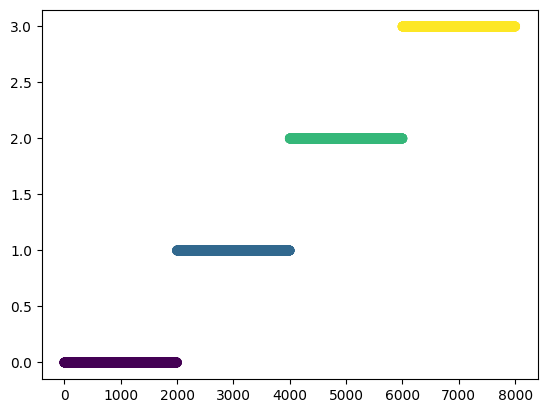

In [4]:
plt.scatter(range(len(y)), y, c=y, cmap='viridis', marker='o')

In [5]:
all_data = []
targets = []

for index, (data, label) in enumerate(zip(X, y)):
    print(f"Index: {index}, Label: {label}") 
    target = torch.eye(K)[int(label)]
    print(f"Target: {target}") 
    targets.append(target)

    all_data.append((index, data, target))

# TODO data is being generated wrong. all data is being made and then split so train never sees some classes. instead, generate new points for each dataset and then put in loader

# Print the first few targets to verify
print("First few targets:")
for i in range(min(10, len(targets))):
    print(targets[i])
print("Last few targets:")
for i in range(max(0, len(targets)-10), len(targets)):
    print(targets[i])

Index: 0, Label: 0.0
Target: tensor([1., 0., 0., 0.])
Index: 1, Label: 0.0
Target: tensor([1., 0., 0., 0.])
Index: 2, Label: 0.0
Target: tensor([1., 0., 0., 0.])
Index: 3, Label: 0.0
Target: tensor([1., 0., 0., 0.])
Index: 4, Label: 0.0
Target: tensor([1., 0., 0., 0.])
Index: 5, Label: 0.0
Target: tensor([1., 0., 0., 0.])
Index: 6, Label: 0.0
Target: tensor([1., 0., 0., 0.])
Index: 7, Label: 0.0
Target: tensor([1., 0., 0., 0.])
Index: 8, Label: 0.0
Target: tensor([1., 0., 0., 0.])
Index: 9, Label: 0.0
Target: tensor([1., 0., 0., 0.])
Index: 10, Label: 0.0
Target: tensor([1., 0., 0., 0.])
Index: 11, Label: 0.0
Target: tensor([1., 0., 0., 0.])
Index: 12, Label: 0.0
Target: tensor([1., 0., 0., 0.])
Index: 13, Label: 0.0
Target: tensor([1., 0., 0., 0.])
Index: 14, Label: 0.0
Target: tensor([1., 0., 0., 0.])
Index: 15, Label: 0.0
Target: tensor([1., 0., 0., 0.])
Index: 16, Label: 0.0
Target: tensor([1., 0., 0., 0.])
Index: 17, Label: 0.0
Target: tensor([1., 0., 0., 0.])
Index: 18, Label: 0.

In [7]:
num_samples = len(all_data)
num_samples

8000

In [9]:
# Split data into train/test
test_size = int(0.15 * num_samples)
val_size = int(0.15 * num_samples)
train_size = num_samples - (test_size + val_size)

test_end_idx = test_size
val_end_idx = test_size + val_size

test_data = all_data[:test_end_idx]
val_data = all_data[test_end_idx:val_end_idx]
train_data = all_data[val_end_idx:]

In [10]:
data_generator = torch.Generator()
batch_size = 1

In [11]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, generator=data_generator)
val_loader = DataLoader(val_data, batch_size=len(val_data), shuffle=False, num_workers=0)
test_loader = DataLoader(test_data, batch_size=len(test_data), shuffle=False, num_workers=0)

In [2]:
def generate_spiral_data(N = 2000, K = 4, sigma = 0.16):
    t = torch.linspace(0, 1, N) # Generate linearly spaced values from 0 to 1, used as the parameter that varies along the length of the spiral
    X = torch.zeros(K*N, 2)
    y = torch.zeros(K*N)

    # arm_index is the offset or phase shift, allowing the function to generate points for each arm in the spiral
    for arm_index in range(K):
        X[arm_index*N:(arm_index+1)*N, 0] = t*(torch.sin(2*np.pi/K*(2*t+arm_index)) + sigma*torch.randn(N))
        X[arm_index*N:(arm_index+1)*N, 1] = t*(torch.cos(2*np.pi/K*(2*t+arm_index)) + sigma*torch.randn(N))
        y[arm_index*N:(arm_index+1)*N] = arm_index    

    all_data = []
    for index, (data, label) in enumerate(zip(X, y)):
        target = torch.eye(K)[int(label)]
        all_data.append((index, data, target))

    return all_data

In [3]:
train_data = generate_spiral_data(N=1400)
val_data = generate_spiral_data(N=300)
test_data = generate_spiral_data(N=300)

In [7]:
data_generator = torch.Generator()
batch_size = 1

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, generator=data_generator)
val_loader = DataLoader(val_data, batch_size=len(val_data), shuffle=False, num_workers=0)
test_loader = DataLoader(test_data, batch_size=len(test_data), shuffle=False, num_workers=0)